In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

f = open("./UCI HAR Dataset/train/y_train.txt")
y_data = f.read().split()
y_data = np.array(y_data)

y_label = ["walking","walking_upstaires","walking_downstairs","sitting,standing","laying"]
f.close()
f = open("./UCI HAR Dataset/train/X_train.txt")
X_data_arr = f.read().split()
X_data_arr = np.reshape(X_data_arr,(7352,561))
X_data = pd.DataFrame(X_data_arr)
f.close()
#ラベルデータ
f_label = []
with open('./UCI HAR Dataset/features.txt', mode='rt', encoding='utf-8') as f:
    for line in f:
        l = line.split()
        f_label.append(l[1])

#学習用データ
X_train = X_data.values
Y_train = y_data
X_train = X_train.astype(np.float64)
Y_train = y_data.astype(np.int64)


#テスト用データ
f = open("./UCI HAR Dataset/test/y_test.txt")
Y_test = np.array(f.read().split())
Y_test = Y_test.astype(np.int64)
f.close()

f = open("./UCI HAR Dataset/test/X_test.txt")
X_test = f.read().split()
X_test = np.reshape(X_test,(len(Y_test),int(len(X_test)/len(Y_test))))
X_test = np.array(X_test, dtype=float)


In [2]:
#前処理（標準化＋LDA)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(np.std(X_train[0:]))
lda = LDA(n_components=6)
X_train = lda.fit_transform(X_train,Y_train)
X_test= lda.transform(X_test)
np.shape(X_train)

1.0


c:\users\井原輝人\appdata\local\programs\python\python37\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(7352, 5)

In [3]:
import tensorflow as tf
import tensorflow.keras as keras

# NOTE:
# ================================================
# If you have TensorFlow v1.3 installed
# you can use the keras API by
# importing it from the contrib module
# `import tensorflow.contrib.keras as keras`


In [4]:
Y_train_onehot = keras.utils.to_categorical(Y_train)
print('First 3 labels: ', Y_train[:3])
print('\nFirst 3 labels (one-hot):\n', Y_train_onehot[:3])

First 3 labels:  [5 5 5]

First 3 labels (one-hot):
 [[0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [5]:
model = keras.models.Sequential()

model.add(
    keras.layers.Dense(
        units=50,    
        input_dim=np.shape(X_train)[1],
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))

model.add(
    keras.layers.Dense(
        units=50,    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='tanh'))


model.add(
    keras.layers.Dense(
        units=Y_train_onehot.shape[1],    
        input_dim=50,
        kernel_initializer='glorot_uniform',
        bias_initializer='zeros',
        activation='softmax'))


sgd_optimizer = keras.optimizers.SGD(
        lr=0.0001, decay=1e-7, momentum=.9)

model.compile(optimizer=sgd_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:

print(X_train.dtype)
history = model.fit(X_train, Y_train_onehot,
                    batch_size=64, epochs=60,
                    verbose=1,
                    validation_split=0.1)

float64
Train on 6616 samples, validate on 736 samples
Epoch 1/60
6616/6616 [==============================] - 1s 89us/sample - loss: 1.8758 - accuracy: 0.2480 - val_loss: 1.2241 - val_accuracy: 0.5802
Epoch 2/60
6616/6616 [==============================] - 0s 29us/sample - loss: 1.0053 - accuracy: 0.6640 - val_loss: 0.7917 - val_accuracy: 0.7500
Epoch 3/60
6616/6616 [==============================] - 0s 30us/sample - loss: 0.7180 - accuracy: 0.8059 - val_loss: 0.6064 - val_accuracy: 0.9293
Epoch 4/60
6616/6616 [==============================] - 0s 28us/sample - loss: 0.5767 - accuracy: 0.9592 - val_loss: 0.5009 - val_accuracy: 0.9905
Epoch 5/60
6616/6616 [==============================] - 0s 30us/sample - loss: 0.4885 - accuracy: 0.9781 - val_loss: 0.4294 - val_accuracy: 0.9973
Epoch 6/60
6616/6616 [==============================] - 0s 39us/sample - loss: 0.4259 - accuracy: 0.9823 - val_loss: 0.3764 - val_accuracy: 0.9986
Epoch 7/60
6616/6616 [==============================] - 0s 30us

6616/6616 [==============================] - 0s 30us/sample - loss: 0.0694 - accuracy: 0.9841 - val_loss: 0.0462 - val_accuracy: 0.9986
Epoch 57/60
6616/6616 [==============================] - 0s 30us/sample - loss: 0.0687 - accuracy: 0.9843 - val_loss: 0.0455 - val_accuracy: 0.9986
Epoch 58/60
6616/6616 [==============================] - 0s 28us/sample - loss: 0.0681 - accuracy: 0.9843 - val_loss: 0.0448 - val_accuracy: 0.9986
Epoch 59/60
6616/6616 [==============================] - 0s 29us/sample - loss: 0.0675 - accuracy: 0.9843 - val_loss: 0.0442 - val_accuracy: 0.9986
Epoch 60/60
6616/6616 [==============================] - 0s 29us/sample - loss: 0.0668 - accuracy: 0.9846 - val_loss: 0.0434 - val_accuracy: 0.9986


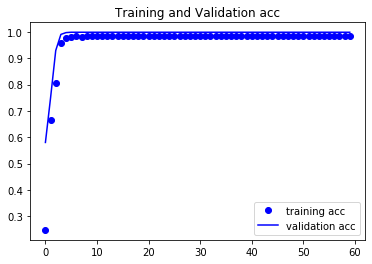

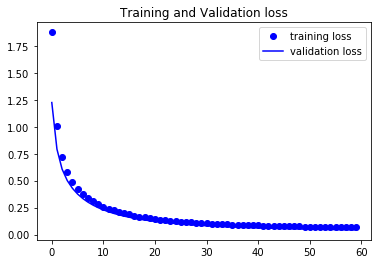

In [7]:
model.metrics_names
import matplotlib.pyplot as plt
%matplotlib inline
 

def  compare_TV(history):
	import matplotlib.pyplot as plt
	acc = history.history['accuracy']
	val_acc = history.history['val_accuracy']
	loss = history.history['loss']
	val_loss = history.history['val_loss']
	epochs = range(len(acc))
	plt.plot(epochs, acc, 'bo' ,label = 'training acc')
	plt.plot(epochs, val_acc, 'b' , label= 'validation acc')
	plt.title('Training and Validation acc')
	plt.legend()
	plt.figure()
	plt.plot(epochs, loss, 'bo' ,label = 'training loss')
	plt.plot(epochs, val_loss, 'b' , label= 'validation loss')
	plt.title('Training and Validation loss')
	plt.legend()
	plt.show()
compare_TV(history)

In [8]:

Y_pred = model.predict_classes(X_test, 
                                    verbose=0)

correct_preds = np.sum((Y_test == Y_pred), axis=0) 
test_acc = correct_preds / Y_test.shape[0]
print('Test accuracy: %.2f%%' % (test_acc * 100))

Test accuracy: 96.57%


## NN 0.9657